In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import date
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
off_train = pd.read_csv('./dataset/ccf_offline_stage1_train.csv', keep_default_na=True)
off_train.columns = [
    'user_id', 'merchant_id', 'coupon_id', 'discount_rate', 'distance', 'date_received', 'date'
]
off_test = pd.read_csv('./dataset/ccf_offline_stage1_test_revised.csv', keep_default_na=True)
off_test.columns = [
    'user_id', 'merchant_id', 'coupon_id', 'discount_rate', 'distance', 'date_received'
]
on_train = pd.read_csv('./dataset/ccf_online_stage1_train.csv', keep_default_na=True)
on_train.columns = [
    'user_id', 'merchant_id', 'coupon_id', 'discount_rate', 'distance', 'date_received', 'date'
]

In [4]:
off_train.head()

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received,date
0,1439408,2632,NaN,NaN,0.0,NaN,20160217.0
1,1439408,4663,11002.0,150:20,1.0,20160528.0,NaN
2,1439408,2632,8591.0,20:1,0.0,20160217.0,NaN
3,1439408,2632,1078.0,20:1,0.0,20160319.0,NaN
4,1439408,2632,8591.0,20:1,0.0,20160613.0,NaN


In [5]:
on_train.head()

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received,date
0,13740231,18907,2,100017492,500:50,20160513.0,NaN
1,13740231,34805,1,NaN,NaN,NaN,20160321.0
2,14336199,18907,0,NaN,NaN,NaN,20160618.0
3,14336199,18907,0,NaN,NaN,NaN,20160618.0
4,14336199,18907,0,NaN,NaN,NaN,20160618.0


In [6]:
off_test.head()

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received
0,4129537,450,9983,30:5,1.0,20160712
1,6949378,1300,3429,30:5,NaN,20160706
2,2166529,7113,6928,200:20,5.0,20160727
3,2166529,7113,1808,100:10,5.0,20160727
4,6172162,7605,6500,30:1,2.0,20160708


In [7]:
off_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754884 entries, 0 to 1754883
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        int64  
 1   merchant_id    int64  
 2   coupon_id      float64
 3   discount_rate  object 
 4   distance       float64
 5   date_received  float64
 6   date           float64
dtypes: float64(4), int64(2), object(1)
memory usage: 93.7+ MB


In [8]:
on_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11429826 entries, 0 to 11429825
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        int64  
 1   merchant_id    int64  
 2   coupon_id      int64  
 3   discount_rate  object 
 4   distance       object 
 5   date_received  float64
 6   date           float64
dtypes: float64(2), int64(3), object(2)
memory usage: 610.4+ MB


In [11]:
off_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113640 entries, 0 to 113639
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user_id        113640 non-null  int64  
 1   merchant_id    113640 non-null  int64  
 2   coupon_id      113640 non-null  int64  
 3   discount_rate  113640 non-null  object 
 4   distance       101576 non-null  float64
 5   date_received  113640 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 5.2+ MB


In [12]:
off_train.describe()

,user_id,merchant_id,coupon_id,distance,date_received,date
count,1.754884e+06,1.754884e+06,1.053282e+06,1.648881e+06,1.053282e+06,7.769840e+05
mean,3.689255e+06,4.038808e+03,6.815398e+03,2.361636e+00,2.016032e+07,2.016040e+07
std,2.123428e+06,2.435963e+03,4.174276e+03,3.483974e+00,1.771416e+02,1.621500e+02
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.016010e+07,2.016010e+07
25%,1.845052e+06,1.983000e+03,2.840000e+03,0.000000e+00,2.016013e+07,2.016031e+07
50%,3.694446e+06,3.532000e+03,7.430000e+03,0.000000e+00,2.016032e+07,2.016042e+07
75%,5.528759e+06,6.329000e+03,1.032300e+04,3.000000e+00,2.016051e+07,2.016052e+07
max,7.361032e+06,8.856000e+03,1.404500e+04,1.000000e+01,2.016062e+07,2.016063e+07


In [13]:
on_train.describe()

,user_id,merchant_id,coupon_id,date_received,date
count,1.142983e+07,1.142983e+07,1.142983e+07,8.723570e+05,1.077393e+07
mean,1.074683e+07,3.436686e+04,2.348193e-01,2.016037e+07,2.016039e+07
std,4.137712e+06,1.441243e+04,5.426314e-01,1.560031e+02,1.732371e+02
min,4.000000e+00,1.000100e+04,0.000000e+00,2.016010e+07,2.016010e+07
25%,1.019827e+07,2.090100e+04,0.000000e+00,2.016023e+07,2.016023e+07
50%,1.196970e+07,3.420000e+04,0.000000e+00,2.016040e+07,2.016041e+07
75%,1.373506e+07,4.741500e+04,0.000000e+00,2.016051e+07,2.016052e+07
max,1.550000e+07,6.000000e+04,2.000000e+00,2.016062e+07,2.016063e+07


In [14]:
off_test.describe()

,user_id,merchant_id,coupon_id,distance,date_received
count,1.136400e+05,113640.000000,113640.000000,101576.000000,1.136400e+05
mean,3.684858e+06,2962.283853,9053.810929,2.328040,2.016072e+07
std,2.126259e+06,2494.450802,4145.873088,3.260755,9.019508e+00
min,2.090000e+02,6.000000,3.000000,0.000000,2.016070e+07
25%,1.844191e+06,760.000000,5023.000000,0.000000,2.016071e+07
50%,3.683266e+06,2050.000000,9983.000000,1.000000,2.016072e+07
75%,5.525845e+06,5138.000000,13602.000000,3.000000,2.016072e+07
max,7.361024e+06,8856.000000,14045.000000,10.000000,2.016073e+07


In [15]:
off_train.isnull().sum()

user_id               0
merchant_id           0
coupon_id        701602
discount_rate    701602
distance         106003
date_received    701602
date             977900
dtype: int64

In [16]:
on_train.isnull().sum()

user_id                 0
merchant_id             0
coupon_id               0
discount_rate    10557469
distance         10557469
date_received    10557469
date               655898
dtype: int64

In [17]:
off_test.isnull().sum()

user_id              0
merchant_id          0
coupon_id            0
discount_rate        0
distance         12064
date_received        0
dtype: int64

In [18]:
# 数据集的领券日期范围
print('offline train date_received')
print(off_train[off_train['date_received'] != 'null']['date_received'].min())
print(off_train[off_train['date_received'] != 'null']['date_received'].max())

print('online train date_received')
print(on_train[on_train['date_received'] != 'null']['date_received'].min())
print(on_train[on_train['date_received'] != 'null']['date_received'].max())

print('test date_received')
print(off_test[off_test['date_received'] != 'null']['date_received'].min())
print(off_test[off_test['date_received'] != 'null']['date_received'].max())

offline train date_received
20160101.0
20160615.0
online train date_received
20160101.0
20160615.0
test date_received
20160701
20160731


In [19]:
# 查看训练集的用券日期范围
print('offline train date')
print(off_train[off_train['date'] != 'null']['date'].min())
print(off_train[off_train['date'] != 'null']['date'].max())

print('online train date')
print(on_train[on_train['date'] != 'null']['date'].min())
print(on_train[on_train['date'] != 'null']['date'].max())

offline train date
20160101.0
20160630.0
online train date
20160101.0
20160630.0


#### 训练集和测试集的相关性

In [20]:
# 查看online和offline训练集的user_id与测试集的重合度
off_train_user = off_train[['user_id']].copy().drop_duplicates()
off_test_user = off_test[['user_id']].copy().drop_duplicates()
on_train_user = on_train[['user_id']].copy().drop_duplicates()
print('offline 训练集用户id数量')
print(off_train_user.user_id.count())
print('offline 测试集用户id数量')
print(off_test_user.user_id.count())
print('online 训练集用户id数量')
print(on_train_user.user_id.count())

off_train_user['off_train_flag'] = 1
off_merge = off_test_user.merge(off_train_user, on='user_id', how='left').reset_index().fillna(0)
print('offline 训练集用户和测试集用户的重复数量')
print(off_merge['off_train_flag'].sum())
print('offline 训练集用户与测试集重复用户在总测试集用户中的占比')
print(off_merge['off_train_flag'].sum() / off_merge['off_train_flag'].count())

on_train_user['on_train_flag'] = 1
on_merge = off_test_user.merge(on_train_user, on='user_id', how='left').reset_index().fillna(0)
print('online 训练集用户和测试集用户的重复数量')
print(on_merge['on_train_flag'].sum())
print('online 训练集用户与测试集重复用户在总测试集用户中的占比')
print(on_merge['on_train_flag'].sum() / on_merge['on_train_flag'].count())

offline 训练集用户id数量
539438
offline 测试集用户id数量
76309
online 训练集用户id数量
762858
offline 训练集用户和测试集用户的重复数量
76307.0
offline 训练集用户与测试集重复用户在总测试集用户中的占比
0.9999737907717308
online 训练集用户和测试集用户的重复数量
43155.0
online 训练集用户与测试集重复用户在总测试集用户中的占比
0.5655296229802513


In [22]:
# 查看online和offline训练集的merchant_id与测试集的重合度
off_train_merchant = off_train[['merchant_id']].copy().drop_duplicates()
off_test_merchant = off_test[['merchant_id']].copy().drop_duplicates()
on_train_merchant = on_train[['merchant_id']].copy().drop_duplicates()
print('offline 训练集商家id数量')
print(off_train_merchant.merchant_id.count())
print('online 训练集商家id数量')
print(on_train_merchant.merchant_id.count())
print('offline 测试集商家id数量')
print(off_test_merchant.merchant_id.count())

off_train_merchant['off_train_flag'] = 1
off_merge = off_test_merchant.merge(off_train_merchant, on='merchant_id', how='left').reset_index().fillna(0)
print('offline 训练集用户和测试集商家的重复数量')
print(off_merge['off_train_flag'].sum())
print('offline 训练集用户与测试集重复商家在总测试集用户中的占比')
print(off_merge['off_train_flag'].sum() / off_merge['off_train_flag'].count())

on_train_merchant['on_train_flag'] = 1
on_merge = off_test_merchant.merge(on_train_merchant, on='merchant_id', how='left').reset_index().fillna(0)
print('online 训练集用户和测试集商家的重复数量')
print(on_merge['on_train_flag'].sum())
print('online 训练集用户与测试集重复商家在总测试集用户中的占比')
print(on_merge['on_train_flag'].sum() / on_merge['on_train_flag'].count())

offline 训练集商家id数量
8415
online 训练集商家id数量
7999
offline 测试集商家id数量
1559
offline 训练集用户和测试集商家的重复数量
1558.0
offline 训练集用户与测试集重复商家在总测试集用户中的占比
0.9993585631815266
online 训练集用户和测试集商家的重复数量
0.0
online 训练集用户与测试集重复商家在总测试集用户中的占比
0.0


In [23]:
# 查看online和offline训练集的coupon_id与测试集的重合度
off_train_coupon = off_train[['coupon_id']].copy().drop_duplicates()
off_test_coupon = off_test[['coupon_id']].copy().drop_duplicates()
on_train_coupon = on_train[['coupon_id']].copy().drop_duplicates()
print('offline 训练集优惠券id数量')
print(off_train_coupon.coupon_id.count())
print('online 训练集优惠券id数量')
print(on_train_coupon.coupon_id.count())
print('offline 测试集优惠券id数量')
print(off_test_coupon.coupon_id.count())

off_train_coupon['off_train_flag'] = 1
off_merge = off_test_coupon.merge(off_train_coupon, on='coupon_id', how='left').reset_index().fillna(0)
print('offline 训练集用户和测试集优惠券的重复数量')
print(off_merge['off_train_flag'].sum())
print('offline 训练集用户与测试集重复优惠券在总测试集用户中的占比')
print(off_merge['off_train_flag'].sum() / off_merge['off_train_flag'].count())

on_train_coupon['on_train_flag'] = 1
on_merge = off_test_coupon.merge(on_train_coupon, on='coupon_id', how='left').reset_index().fillna(0)
print('online 训练集用户和测试集优惠券的重复数量')
print(on_merge['on_train_flag'].sum())
print('online 训练集用户与测试集重复优惠券在总测试集用户中的占比')
print(on_merge['on_train_flag'].sum() / on_merge['on_train_flag'].count())

offline 训练集优惠券id数量
9738
online 训练集优惠券id数量
3
offline 测试集优惠券id数量
2050
offline 训练集用户和测试集优惠券的重复数量
1118.0
offline 训练集用户与测试集重复优惠券在总测试集用户中的占比
0.5453658536585366
online 训练集用户和测试集优惠券的重复数量
0.0
online 训练集用户与测试集重复优惠券在总测试集用户中的占比
0.0


#### 数据统计

In [28]:
# 折扣率
off_train['discount_rate'].value_counts()

30:5       270712
100:10     182554
200:20     111046
20:5        91013
20:1        51705
50:5        47379
100:30      38196
200:30      29327
300:30      28979
50:10       28452
10:5        25925
0.95        20568
10:1        17842
30:1        17654
150:20      17437
100:20      14297
30:10       12692
50:20        8203
0.9          8085
200:50       5585
150:10       5325
100:5        5053
0.8          3441
50:1         3354
5:1          2526
100:50       1774
150:30        654
0.85          649
200:10        575
100:1         537
20:10         514
150:50        306
300:50        206
0.5           186
0.75          121
0.2           110
0.6            58
200:5          57
300:20         56
0.7            54
30:20          24
300:10         23
200:100        12
50:30           9
150:5           7
Name: discount_rate, dtype: int64

In [30]:
off_test.discount_rate.value_counts()

30:5       59318
20:1       11273
50:10       7476
20:5        7026
200:20      5496
30:1        4016
10:1        3758
100:10      3706
50:5        2693
100:20      2327
0.95         991
0.9          827
0.8          735
150:5        495
100:5        467
30:10        407
10:5         346
50:1         339
200:30       258
150:20       248
100:30       229
150:30       181
5:1          171
300:30       136
200:50       124
20:10        114
100:50        97
50:20         97
150:50        92
150:10        61
30:20         32
200:10        26
300:50        19
200:5         18
100:1         14
0.5           10
300:20        10
200:100        3
0.6            1
0.85           1
500:30         1
0.7            1
Name: discount_rate, dtype: int64

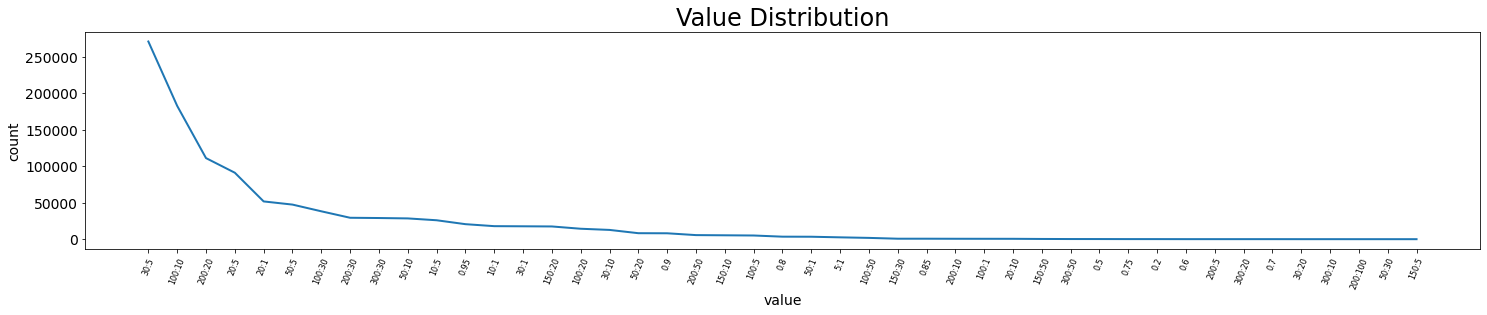

In [31]:
# 可视化
plt.rcParams['figure.figsize'] = (25., 4.)
plt.title('Value Distribution', fontsize=24)
plt.xlabel('value', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.tick_params(axis='both', labelsize=14) # 设置横纵的刻度标记
plt.xticks(size='small', rotation=68, fontsize=8) # 设置x轴标签
plt.plot(off_train['discount_rate'].value_counts(), linewidth=2)
plt.show()

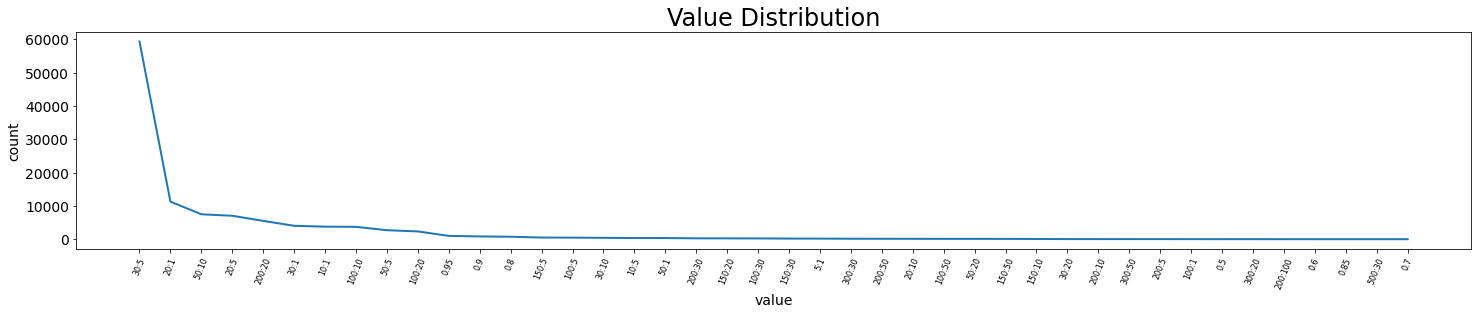

In [32]:
plt.rcParams['figure.figsize'] = (25., 4.)
plt.title('Value Distribution', fontsize=24)
plt.xlabel('value', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.tick_params(axis='both', labelsize=14) # 设置横纵的刻度标记
plt.xticks(size='small', rotation=68, fontsize=8) # 设置x轴标签
plt.plot(off_test['discount_rate'].value_counts(), linewidth=2)
plt.show()

In [33]:
# 对距离distance一项进行统计
off_train['distance'].value_counts()

0.0     826070
1.0     227221
10.0    206484
2.0     118413
3.0      76598
4.0      55085
5.0      41452
6.0      32483
7.0      25681
8.0      21436
9.0      17958
Name: distance, dtype: int64

In [34]:
off_test['distance'].value_counts()

0.0     43867
1.0     18474
10.0    10353
2.0      9523
3.0      5934
4.0      4006
5.0      2977
6.0      2179
7.0      1685
8.0      1359
9.0      1219
Name: distance, dtype: int64

### 数据分布

In [67]:
# 对文本数据对数值化处理
separator = ':'
# 计算折扣率， 将满减和折扣统一
# 当discount_rate为Null时一般都是没有使用优惠券，这时折扣应该是1
def get_discount_rate(s):
    s = str(s)
    if s == 'null' or s == 'nan': # 和书上不一样，加上 or s == 'nan'。 以下同样加上
        return -1
    s = s.split(separator)
    if len(s) == 1:
        return float(s[0])
    else:
        return 1.0 - float(s[1]) / float(s[0])

# 获取是否满减
def get_if_fd(s):
    s = str(s)
    s = s.split(separator)
    if len(s) == 1:
        return 0
    else:
        return 1

# 获取满减的条件
def get_full_value(s):
    s = str(s)
    s = s.split(separator)
    if len(s) == 1:
        return -1
    else:
        return int(s[0])

# 获取满减的优惠
def get_reduction_value(s):
    s = str(s)
    s = s.split(separator)
    if len(s) == 1:
        return -1
    else:
        return int(s[1])

# 获取月份
def get_month(s):
    if s[0] == 'null' or s[0] == 'nan':
        return -1
    else:
        return int(s[4:6])

# 获取日期
def get_day(s):
    if s[0] == 'null' or s[0] == 'nan':
        return -1
    else:
        return int(s[6:8])

# 获取日期间隔，输入内容为：Date:Date_received
def get_day_gap(s):
    s = s.split(separator)
    if s[0] == 'null' or s[0] == 'nan':
        return -1
    if s[1] == 'null' or s[1] == 'nan':
        return -1
    else:
        return (date(int(s[0][0:4]), int(s[0][4:6]), int(s[0][6:8])) -
                date(int(s[1][0:4]), int(s[1][4:6]), int(s[1][6:8]))).days

# 获取label， 输入格式为: Date:Date_received
def get_label(s):
    s = s.split(separator)
    if s[0] == 'null' or s[0] == 'nan':
        return 0
    if s[1] == 'null' or s[1] == 'nan':
        return -1
    elif (date(int(s[0][0:4]), int(s[0][4:6]), int(s[0][6:8])) -
                date(int(s[1][0:4]), int(s[1][4:6]), int(s[1][6:8]))).days <= 15:
        return 1
    else:
        return -1

In [68]:
# 通过pandas.apply()函数调用，对数据进行处理
def add_feature(df):
    df['if_fd'] = df['discount_rate'].apply(get_if_fd)  # 是否满减
    df['full_value'] = df['discount_rate'].apply(get_full_value) # 满减的条件
    df['reduction_value'] = df['discount_rate'].apply(get_reduction_value) # 满减的优惠
    df['discount_rate'] = df['discount_rate'].apply(get_discount_rate) # 折扣率
    df['distance'] = df['distance'].fillna(-1).astype(int)
    # df['month_received'] = df['date_received'].apply(get_month)
    # df['month'] = df['date'].apply(get_month)
    return df

def add_label(df):
    df['day_gap'] = df['date'].astype('str') + ':' + df['date_received'].astype('str') # 日期间隔 Date:Date_received
    df['label'] = df['day_gap'].apply(get_label)
    df['day_gap'] = df['day_gap'].apply(get_day_gap) # 间隔了几天
    return df

In [69]:
# 拷贝数据，以免在调试时重读文件
dftrain = off_train.copy()
dftest = off_test.copy()

dftrain = add_feature(dftrain)
dftrain = add_label(dftrain)

dftest = add_feature(dftest)

In [70]:
dftrain.describe()

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received,date,if_fd,full_value,reduction_value,day_gap,label
count,1.754884e+06,1.754884e+06,1.053282e+06,1.754884e+06,1.754884e+06,1.053282e+06,7.769840e+05,1.754884e+06,1.754884e+06,1.754884e+06,1.754884e+06,1.754884e+06
mean,3.689255e+06,4.038808e+03,6.815398e+03,1.069696e-01,2.158577e+00,2.016032e+07,2.016040e+07,5.812407e-01,4.665974e+01,5.807668e+00,-6.212582e-01,-3.693657e-01
std,2.123428e+06,2.435963e+03,4.174276e+03,9.061683e-01,3.470772e+00,1.771416e+02,1.621500e+02,4.933559e-01,6.830349e+01,9.037305e+00,2.414021e+00,5.534657e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,2.016010e+07,2.016010e+07,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,1.845052e+06,1.983000e+03,2.840000e+03,-1.000000e+00,0.000000e+00,2.016013e+07,2.016031e+07,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
50%,3.694446e+06,3.532000e+03,7.430000e+03,7.500000e-01,0.000000e+00,2.016032e+07,2.016042e+07,1.000000e+00,2.000000e+01,5.000000e+00,-1.000000e+00,0.000000e+00
75%,5.528759e+06,6.329000e+03,1.032300e+04,9.000000e-01,3.000000e+00,2.016051e+07,2.016052e+07,1.000000e+00,1.000000e+02,1.000000e+01,-1.000000e+00,0.000000e+00
max,7.361032e+06,8.856000e+03,1.404500e+04,9.900000e-01,1.000000e+01,2.016062e+07,2.016063e+07,1.000000e+00,3.000000e+02,1.000000e+02,9.600000e+01,1.000000e+00


In [71]:
dftest.describe()

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received,if_fd,full_value,reduction_value
count,1.136400e+05,113640.000000,113640.000000,113640.000000,113640.000000,1.136400e+05,113640.000000,113640.000000,113640.000000
mean,3.684858e+06,2962.283853,9053.810929,0.850671,1.974736,2.016072e+07,0.977420,43.396507,6.089141
std,2.126259e+06,2494.450802,4145.873088,0.063551,3.248809,9.019508e+00,0.148561,44.239815,5.640310
min,2.090000e+02,6.000000,3.000000,0.333333,-1.000000,2.016070e+07,0.000000,-1.000000,-1.000000
25%,1.844191e+06,760.000000,5023.000000,0.833333,0.000000,2.016071e+07,1.000000,30.000000,5.000000
50%,3.683266e+06,2050.000000,9983.000000,0.833333,1.000000,2.016072e+07,1.000000,30.000000,5.000000
75%,5.525845e+06,5138.000000,13602.000000,0.900000,3.000000,2.016072e+07,1.000000,30.000000,5.000000
max,7.361024e+06,8856.000000,14045.000000,0.990000,10.000000,2.016073e+07,1.000000,500.000000,100.000000


In [65]:
# dftrain[dftrain['date'].notnull() & dftrain['date_received'].notnull()].count() # date和date_received都不为空的样本

user_id            75382
merchant_id        75382
coupon_id          75382
discount_rate      75382
distance           75382
date_received      75382
date               75382
if_fd              75382
full_value         75382
reduction_value    75382
day_gap            75382
label              75382
dtype: int64

In [66]:
# dftrain.count()

user_id            1754884
merchant_id        1754884
coupon_id          1053282
discount_rate      1754884
distance           1754884
date_received      1053282
date                776984
if_fd              1754884
full_value         1754884
reduction_value    1754884
day_gap            1754884
label              1754884
dtype: int64

In [72]:
# if_fd 是否满减在训练集和测试集上分布相差较大
# offline 训练集
print('offline 训练集满减情况')
dftrain.if_fd.value_counts() / dftrain.if_fd.count()

offline 训练集满减情况


1    0.581241
0    0.418759
Name: if_fd, dtype: float64

In [73]:
dftrain.if_fd.value_counts()

1    1020010
0     734874
Name: if_fd, dtype: int64

In [74]:
dftrain.if_fd.count()

1754884

In [75]:
# 测试集
print('offline 训练集满减情况')
dftest.if_fd.value_counts() / dftest.if_fd.count()

offline 训练集满减情况


1    0.97742
0    0.02258
Name: if_fd, dtype: float64

#### 数据分布可视化

<AxesSubplot:>

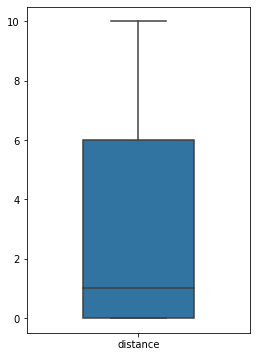

In [89]:
# 1. 箱线图
fig = plt.figure(figsize=(4,6))
sns.boxplot(data=dftrain[(dftrain.label >= 0) & (dftrain.distance >= 0)][['distance']], # 此处与书上不一样[['distance']]
            orient='v',
            width=0.5)

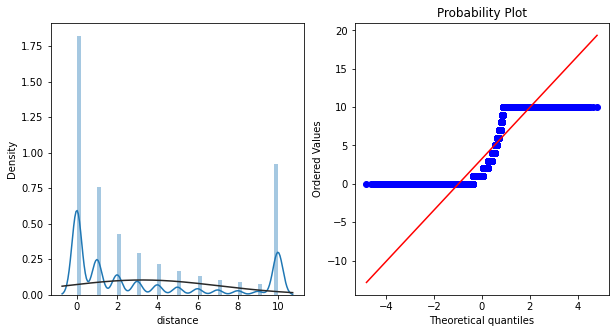

In [92]:
# 2. 直方图和Q-Q图
plt.figure(figsize=(10, 5))
ax = plt.subplot(1,2,1)
sns.distplot(dftrain[(dftrain.label >= 0) & (dftrain.distance >=0)]['distance'],
             fit=stats.norm)
ax = plt.subplot(1,2,2)
res = stats.probplot(dftrain[(dftrain.label >= 0) & (dftrain.distance >=0)]['distance'],
                     plot=plt)

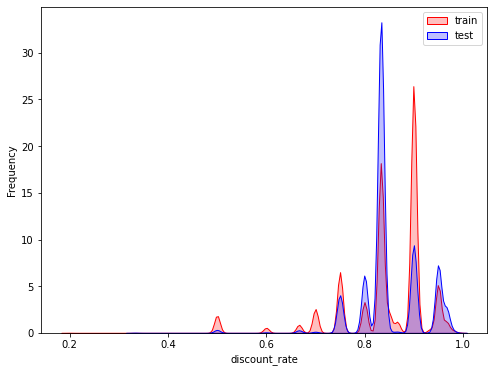

In [97]:
# 3. 分布对比 Kdeplot
plt.figure(figsize=(8,6))
ax = sns.kdeplot(dftrain[(dftrain.label >= 0) & (dftrain.discount_rate >=0)]['discount_rate'],
                 color='Red',
                 shade=True)
ax = sns.kdeplot(dftest[(dftest.discount_rate >=0)]['discount_rate'],
                 color='Blue',
                 shade=True)
ax.set_xlabel('discount_rate')
ax.set_ylabel('Frequency')
ax = ax.legend(['train', 'test'])

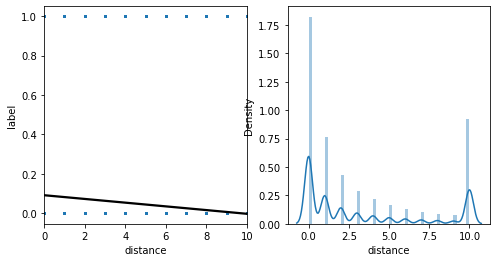

In [99]:
# 4. 线性关系 regplot()
# !!! 风扇起飞 大约运行1分钟
fcols = 2
frows = 1
plt.figure(figsize=(8,4))
ax = plt.subplot(1,2,1)
sns.regplot(x='distance',
            y='label',
            data=dftrain[(dftrain.label >= 0) & (dftrain.distance >=0)][['distance', 'label']],
            ax=ax,
            scatter_kws={
                'marker': '.',
                's': 3,
                'alpha': 0.3
            },
            line_kws={'color': 'k'})
plt.xlabel('distance')
plt.ylabel('label')
ax = plt.subplot(1,2,2)
sns.distplot(dftrain[(dftrain.label >= 0) & (dftrain.distance >=0)]['distance'].dropna())
plt.xlabel('distance')
plt.show()